# Import Packages

In [1]:
import numpy as np
import pandas as pd
import math
import numpy as np
import sys, os
import importlib
import time


import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN/"
Data_High_Level_Features_path =  HOMEPATH + "Data_High_Level_Features/"

# Define Plot Making Method

In [12]:
def HIST(process, length, title, colors, linestyle,xpo=1,ypo=1):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='post',linewidth=5, alpha=0.7, label=title[i])
#     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
title = ["Herwig Angular", "Pythia default", "Pythia vincia", "Pythia dipole", "Sherpa", 
         "Herwig Angular QCD", "Pythia default QCD", "Pythia vincia QCD", "Pythia dipole QCD","Sherpa QCD"]
colors = ["green","red","darkred","blue","magenta",
          "cyan","orange","darkred","darkblue","darkgreen"]
linestyle = ["-","-.","--",":","X",
             "D","s","^","H","h","*"]


title = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa"]
colors = ["green","red","darkred","blue","magenta"]
linestyle = ["-","-.","--",":","X"]

# Read Data by Pandas

In [36]:
# preprocess = "trimmed"
preprocess = "untrimmed"

herwig_ang_W = pd.read_csv(Data_High_Level_Features_path + "herwig_ang_W" + "_" + str(preprocess) + ".csv")
herwig_ang_QCD = pd.read_csv(Data_High_Level_Features_path + "herwig_ang_QCD" + "_" + str(preprocess) + ".csv")
pythia_def_W = pd.read_csv(Data_High_Level_Features_path + "pythia_def_W" + "_" + str(preprocess) + ".csv")
pythia_def_QCD = pd.read_csv(Data_High_Level_Features_path + "pythia_def_QCD" + "_" + str(preprocess) + ".csv")
pythia_vin_W = pd.read_csv(Data_High_Level_Features_path + "pythia_vin_W" + "_" + str(preprocess) + ".csv")
pythia_vin_QCD = pd.read_csv(Data_High_Level_Features_path + "pythia_vin_QCD" + "_" + str(preprocess) + ".csv")
pythia_dip_W = pd.read_csv(Data_High_Level_Features_path + "pythia_dip_W" + "_" + str(preprocess) + ".csv")
pythia_dip_QCD = pd.read_csv(Data_High_Level_Features_path + "pythia_dip_QCD" + "_" + str(preprocess) + ".csv")
sherpa_def_W = pd.read_csv(Data_High_Level_Features_path + "sherpa_def_W" + "_" + str(preprocess) + ".csv")
sherpa_def_QCD = pd.read_csv(Data_High_Level_Features_path + "sherpa_def_QCD" + "_" + str(preprocess) + ".csv")


process_list = [herwig_ang_QCD, herwig_ang_W,
                pythia_def_QCD, pythia_def_W,
                pythia_dip_QCD, pythia_dip_W,
                pythia_vin_QCD, pythia_vin_W,
                sherpa_def_QCD, sherpa_def_W
                ]    

"""
Mass Cut and PT cut
"""
#######################
for j , element in enumerate(process_list):
    element = element[(element["MJ_0"] > 50) & (element["MJ_0"] < 100)]
    element = element[(element["PTJ_0"] > 300) & (element["PTJ_0"] < 400)]
    process_list[j] = element

herwig_ang_QCD, herwig_ang_W = process_list[0], process_list[1]
pythia_def_QCD, pythia_def_W = process_list[2], process_list[3]
pythia_dip_QCD, pythia_dip_W = process_list[4], process_list[5]
pythia_vin_QCD, pythia_vin_W = process_list[6], process_list[7]
sherpa_def_QCD, sherpa_def_W = process_list[8], process_list[9]



print("Herwig Angular: W: {}, QCD: {}".format(herwig_ang_W.shape[0], herwig_ang_QCD.shape[0]))
print("Pythia Default: W: {}, QCD: {}".format(pythia_def_W.shape[0], pythia_def_QCD.shape[0]))
print("Pythia Vincia: W: {}, QCD: {}".format(pythia_vin_W.shape[0], pythia_vin_QCD.shape[0]))
print("Pythia Dipole: W: {}, QCD: {}".format(pythia_dip_W.shape[0], pythia_dip_QCD.shape[0]))
print("Sherpa Default: W: {}, QCD: {}".format(sherpa_def_W.shape[0], sherpa_def_QCD.shape[0]))



Herwig Angular: W: 73126, QCD: 160370
Pythia Default: W: 84521, QCD: 205409
Pythia Vincia: W: 91921, QCD: 171834
Pythia Dipole: W: 63264, QCD: 146047
Sherpa Default: W: 127480, QCD: 213955


# Making Plots
### Ref: http://arxiv.org/abs/1603.09349
### Ref: https://github.com/ja2006203966/SVJ_/blob/master/H5.py  #for JSS
### Preselection and Trimming (optional):
#### 1. Jet Algorithm: PTmin = 300 GeV, R = 1.2, anti-kt
#### 2. (optional) Jet Trimming: r = 0.03, R = 0.2, kt 
#### 3. 50 GeV < $M(j)$ < 100 GeV
#### 4. 300 GeV < $p_T(j)$ < 400 GeV


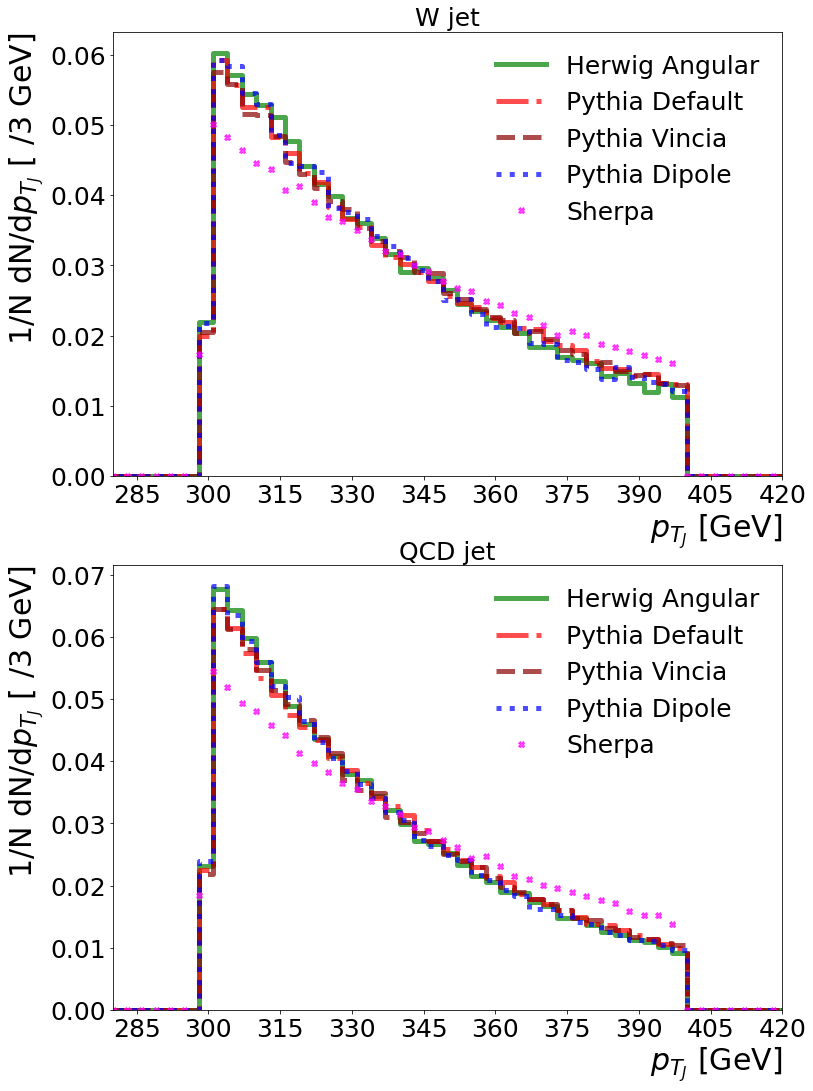

In [24]:
feature = "PTJ_0"
W_j = [herwig_ang_W[feature], pythia_def_W[feature], pythia_vin_W[feature], pythia_dip_W[feature], sherpa_def_W[feature]]
QCD_j = [herwig_ang_QCD[feature], pythia_def_QCD[feature], pythia_vin_QCD[feature], pythia_dip_QCD[feature], sherpa_def_QCD[feature]]

M_j = [W_j,QCD_j]
Type_name = ["W jet", "QCD jet"]

xmin,xmax,grid = 250, 550, 101

plt.figure(figsize=(12,18))

for index, Type in enumerate(M_j):
    plot_axis = plt.subplot(2,1,index+1)
    for i, process in enumerate(Type):
        length = np.linspace(xmin,xmax,grid)
        HIST(process, length, title,colors[i],linestyle[i])
        plot_axis.tick_params(axis='x', labelsize=25)
        plot_axis.tick_params(axis='y', labelsize=25)

        plt.xlim((280, 420))
        plt.xlabel("$p_{T_{J}}$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
        plot_axis.xaxis.set_major_locator(MaxNLocator(10))

    plt.title(Type_name[index],fontsize=25) 
#     plt.text(x=105, y=0.09, s="300 GeV < $p_T$ < 500 GeV",fontsize=25) 
    plt.ylim((0.))
    plt.ylabel("1/N dN/d$p_{T_{J}}$ [ /" + str(int((xmax-xmin)/(grid-1))) + " GeV]", fontsize=30, horizontalalignment='right',y=1)

plt.savefig("./Plots/PTJ.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show() 

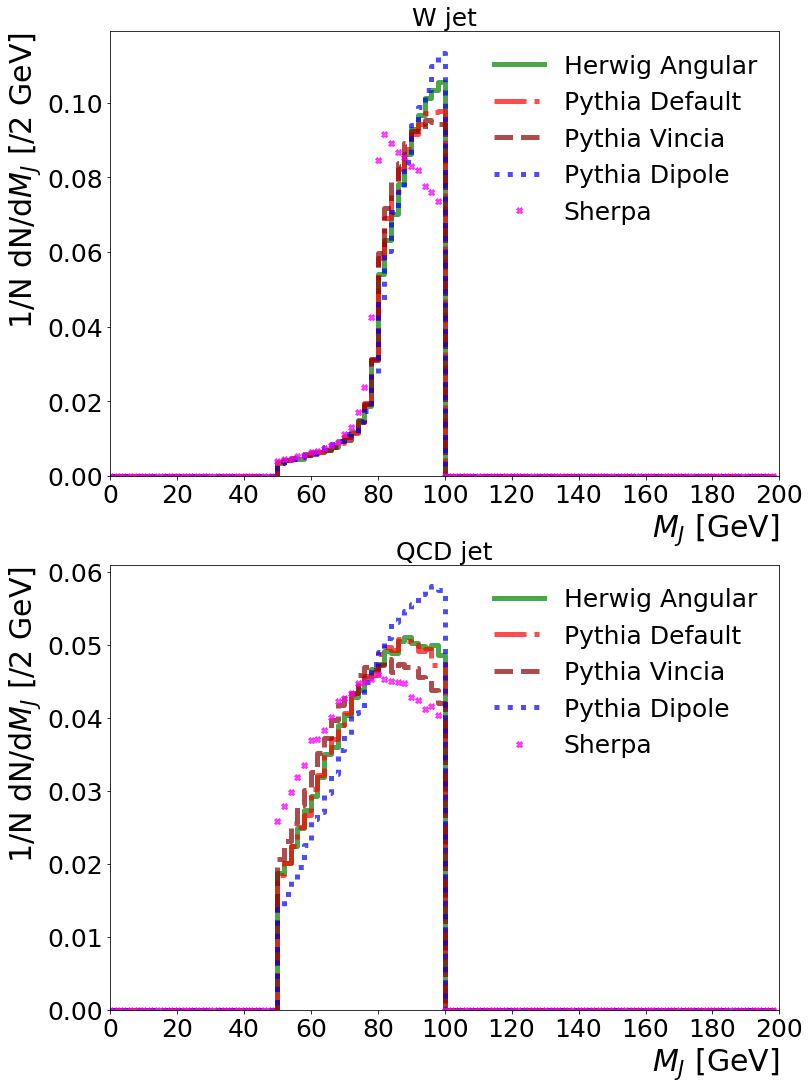

In [38]:
feature = "MJ_0"
W_j = [herwig_ang_W[feature], pythia_def_W[feature], pythia_vin_W[feature], pythia_dip_W[feature], sherpa_def_W[feature]]
QCD_j = [herwig_ang_QCD[feature], pythia_def_QCD[feature], pythia_vin_QCD[feature], pythia_dip_QCD[feature], sherpa_def_QCD[feature]]

M_j = [W_j,QCD_j]
Type_name = ["W jet", "QCD jet"]

xmin,xmax,grid = 0, 200, 101

plt.figure(figsize=(12,18))

for index, Type in enumerate(M_j):
    plot_axis = plt.subplot(2,1,index+1)
    for i, process in enumerate(Type):
        length = np.linspace(xmin,xmax,grid)
        HIST(process, length, title,colors[i],linestyle[i])
        plot_axis.tick_params(axis='x', labelsize=25)
        plot_axis.tick_params(axis='y', labelsize=25)

        plt.xlim((0,200))
        plt.xlabel("$M_{J}$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
        plot_axis.xaxis.set_major_locator(MaxNLocator(10))

    plt.title(Type_name[index],fontsize=25) 
#     plt.text(x=105, y=0.09, s="300 GeV < $p_T$ < 500 GeV",fontsize=25) 
    plt.ylim((0.))
    plt.ylabel("1/N dN/d$M_{J}$ [/" + str(int((xmax-xmin)/(grid-1))) + " GeV]", fontsize=30, horizontalalignment='right',y=1)

plt.savefig("./Plots/Mj.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show() 

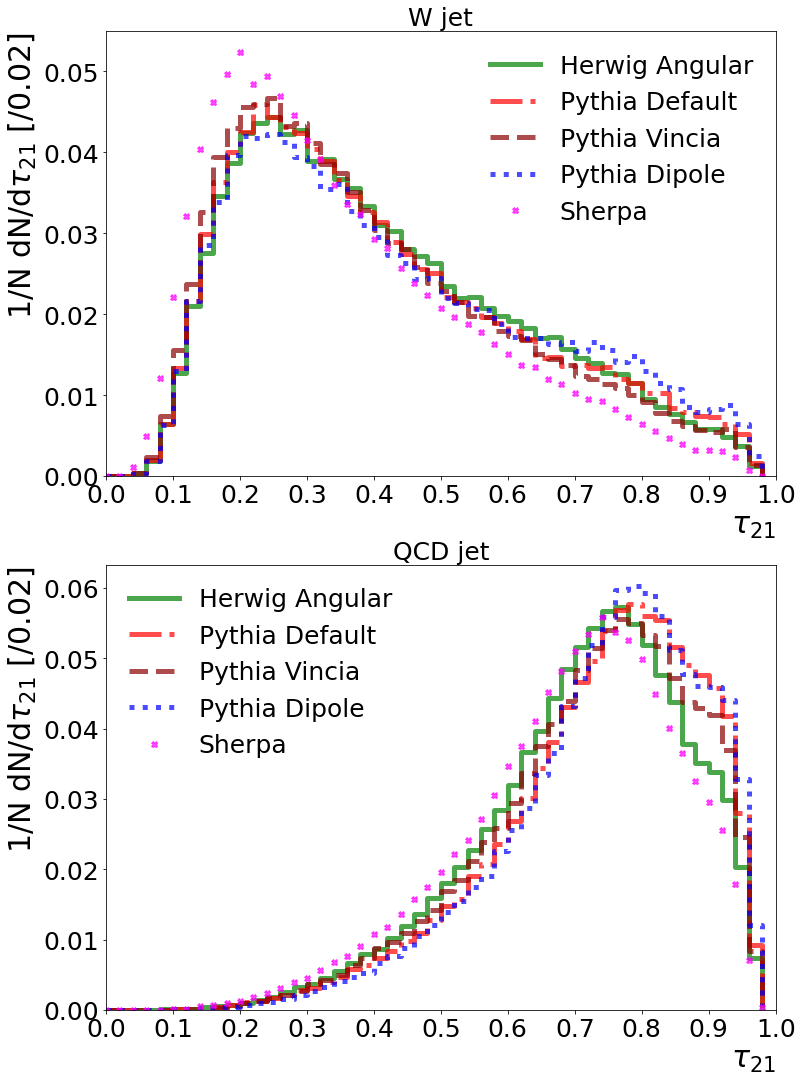

In [39]:
feature = "t21_0"
W_j = [herwig_ang_W[feature], pythia_def_W[feature], pythia_vin_W[feature], pythia_dip_W[feature], sherpa_def_W[feature]]
QCD_j = [herwig_ang_QCD[feature], pythia_def_QCD[feature], pythia_vin_QCD[feature], pythia_dip_QCD[feature], sherpa_def_QCD[feature]]

tau_21 = [W_j,QCD_j]
Type_name = ["W jet", "QCD jet"]

xmin,xmax,grid = 0, 1, 51

plt.figure(figsize=(12,18))

for index, Type in enumerate(tau_21):
    plot_axis = plt.subplot(2,1,index+1)
    for i, process in enumerate(Type):
        length = np.linspace(xmin,xmax,grid)
        HIST(process, length, title,colors[i],linestyle[i])
        plot_axis.tick_params(axis='x', labelsize=25)
        plot_axis.tick_params(axis='y', labelsize=25)

        plt.xlim((0,1))
        plt.xlabel("$\\tau_{21}$", fontsize=30,horizontalalignment='right',x=1) 
        plot_axis.xaxis.set_major_locator(MaxNLocator(10))

    plt.title(Type_name[index],fontsize=25) 
#     plt.text(x=105, y=0.09, s="300 GeV < $p_T$ < 500 GeV",fontsize=25) 
    plt.ylim((0.))
    plt.ylabel("1/N dN/d$\\tau_{21}$ [/" + str((xmax-xmin)/(grid-1)) + "]", fontsize=30, horizontalalignment='right',y=1)
    
plt.savefig("./Plots/t21.png", transparent=True, bbox_inches='tight')
plt.show() 


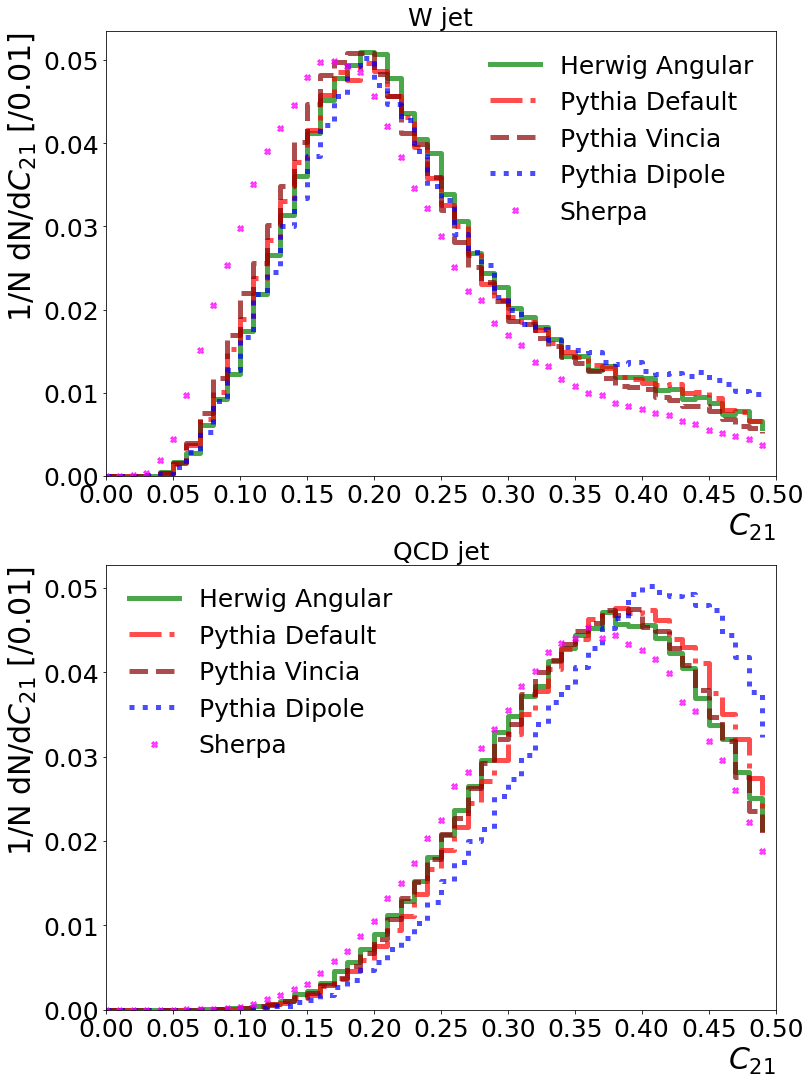

In [40]:
feature = "C21_0"
W_j = [herwig_ang_W[feature], pythia_def_W[feature], pythia_vin_W[feature], pythia_dip_W[feature], sherpa_def_W[feature]]
QCD_j = [herwig_ang_QCD[feature], pythia_def_QCD[feature], pythia_vin_QCD[feature], pythia_dip_QCD[feature], sherpa_def_QCD[feature]]

C_21 = [W_j,QCD_j]
Type_name = ["W jet", "QCD jet"]

xmin,xmax,grid = 0, 0.5, 51

plt.figure(figsize=(12,18))

for index, Type in enumerate(C_21):
    plot_axis = plt.subplot(2,1,index+1)
    for i, process in enumerate(Type):
        length = np.linspace(xmin,xmax,grid)
        HIST(process, length, title,colors[i],linestyle[i])
        plot_axis.tick_params(axis='x', labelsize=25)
        plot_axis.tick_params(axis='y', labelsize=25)

        plt.xlim((0,0.5))
        plt.xlabel("$C_{21}$", fontsize=30,horizontalalignment='right',x=1)
        plot_axis.xaxis.set_major_locator(MaxNLocator(10))

    plt.title(Type_name[index],fontsize=25) 
#     plt.text(x=105, y=0.09, s="300 GeV < $p_T$ < 500 GeV",fontsize=25) 
    plt.ylim((0.))
    plt.ylabel("1/N dN/d$C_{21}$ [/" + str((xmax-xmin)/(grid-1))+"]", fontsize=30, horizontalalignment='right',y=1)

plt.savefig("./Plots/C21.png", transparent=True, bbox_inches='tight')
plt.show() 


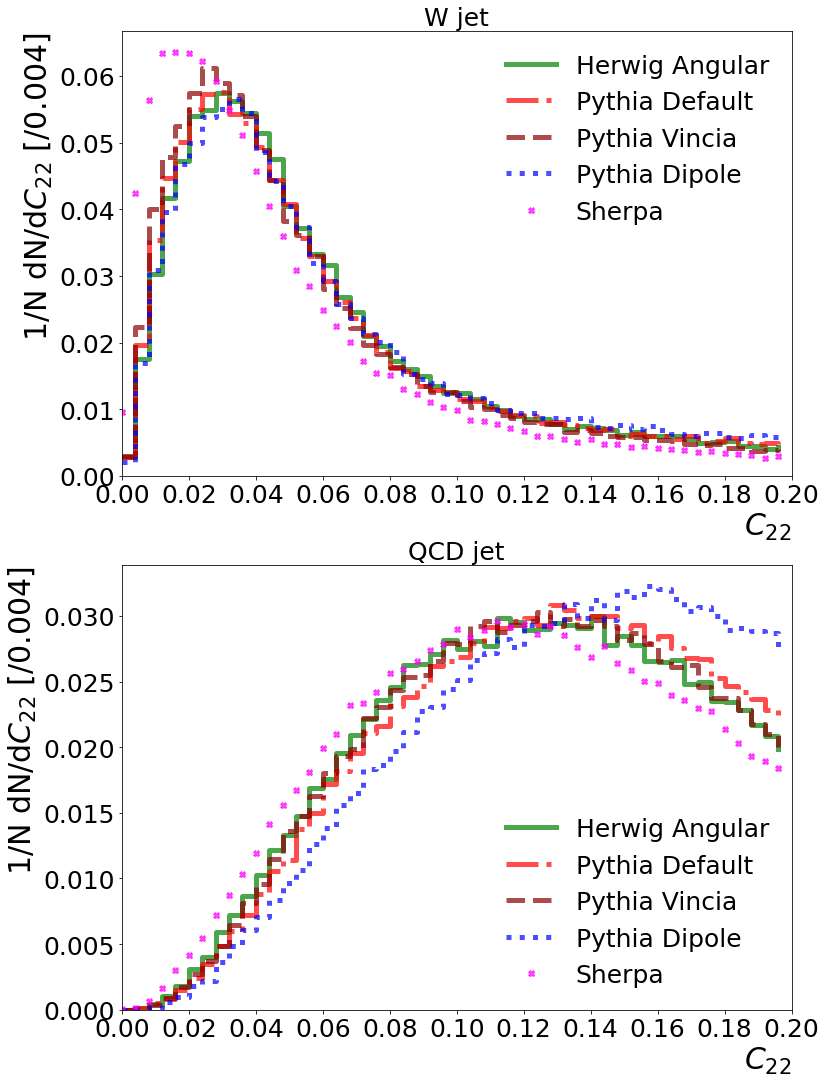

In [41]:
feature = "C22_0"
W_j = [herwig_ang_W[feature], pythia_def_W[feature], pythia_vin_W[feature], pythia_dip_W[feature], sherpa_def_W[feature]]
QCD_j = [herwig_ang_QCD[feature], pythia_def_QCD[feature], pythia_vin_QCD[feature], pythia_dip_QCD[feature], sherpa_def_QCD[feature]]

C_22 = [W_j,QCD_j]
Type_name = ["W jet", "QCD jet"]

xmin,xmax,grid = 0, 0.2, 51

plt.figure(figsize=(12,18))

for index, Type in enumerate(C_22):
    plot_axis = plt.subplot(2,1,index+1)
    for i, process in enumerate(Type):
        length = np.linspace(xmin,xmax,grid)
        HIST(process, length, title,colors[i],linestyle[i])
        plot_axis.tick_params(axis='x', labelsize=25)
        plot_axis.tick_params(axis='y', labelsize=25)

        plt.xlim((0,0.2))
        plt.xlabel("$C_{22}$", fontsize=30,horizontalalignment='right',x=1) 
        plot_axis.xaxis.set_major_locator(MaxNLocator(10))

    plt.title(Type_name[index],fontsize=25) 
#     plt.text(x=105, y=0.09, s="300 GeV < $p_T$ < 500 GeV",fontsize=25) 
    plt.ylim((0.))
    plt.ylabel("1/N dN/d$C_{22}$ [/" + str((xmax-xmin)/(grid-1))+"]", fontsize=30, horizontalalignment='right',y=1)
    

plt.savefig("./Plots/C22.png", transparent=True, bbox_inches='tight')
plt.show() 


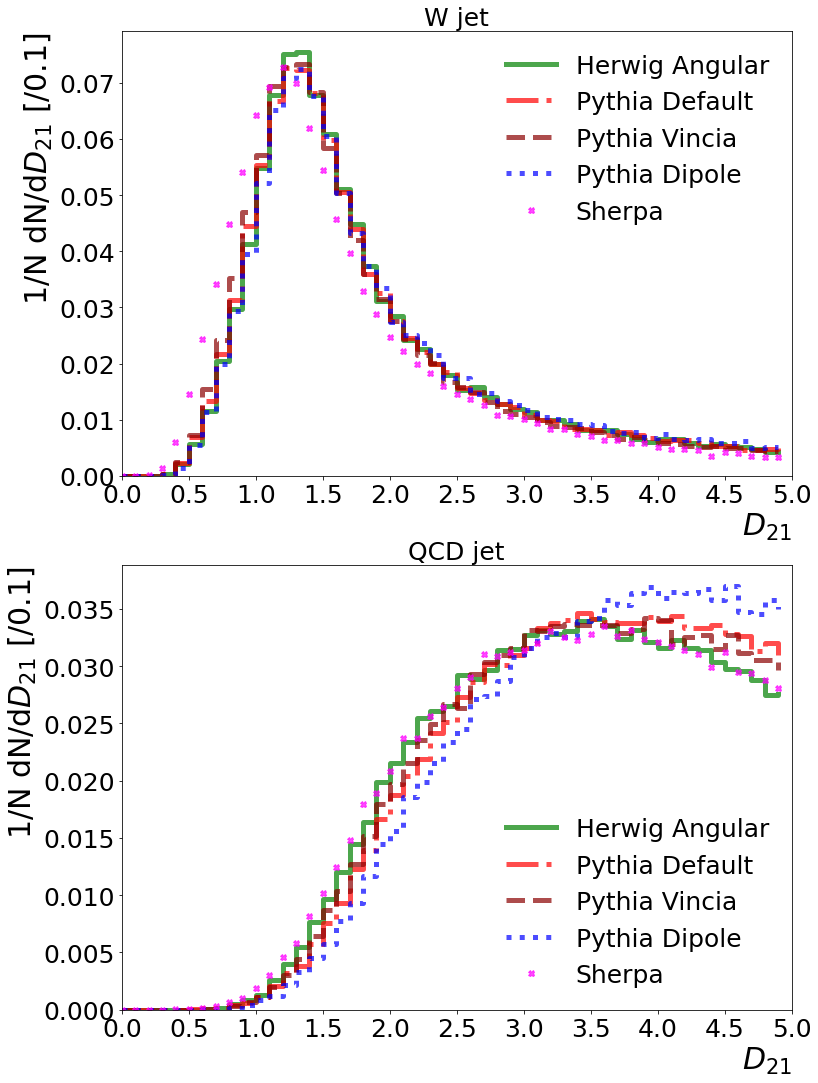

In [42]:
feature = "D21_0"
W_j = [herwig_ang_W[feature], pythia_def_W[feature], pythia_vin_W[feature], pythia_dip_W[feature], sherpa_def_W[feature]]
QCD_j = [herwig_ang_QCD[feature], pythia_def_QCD[feature], pythia_vin_QCD[feature], pythia_dip_QCD[feature], sherpa_def_QCD[feature]]

D_21 = [W_j,QCD_j]
Type_name = ["W jet", "QCD jet"]

xmin, xmax, grid = 0, 5, 51

plt.figure(figsize=(12,18))

for index, Type in enumerate(D_21):
    plot_axis = plt.subplot(2,1,index+1)
    for i, process in enumerate(Type):
        length = np.linspace(xmin,xmax,grid)
        HIST(process, length, title,colors[i],linestyle[i])
        plot_axis.tick_params(axis='x', labelsize=25)
        plot_axis.tick_params(axis='y', labelsize=25)

        plt.xlim((0,5))
        plt.xlabel("$D_{21}$", fontsize=30,horizontalalignment='right',x=1) 
        plot_axis.xaxis.set_major_locator(MaxNLocator(10))

    plt.title(Type_name[index],fontsize=25) 
#     plt.text(x=105, y=0.09, s="300 GeV < $p_T$ < 500 GeV",fontsize=25) 
    plt.ylim((0.))
    plt.ylabel("1/N dN/d$D_{21}$ [/" + str((xmax-xmin)/(grid-1))+"]", fontsize=30, horizontalalignment='right',y=1)
    
plt.savefig("./Plots/D21.png", transparent=True, bbox_inches='tight')
plt.show() 


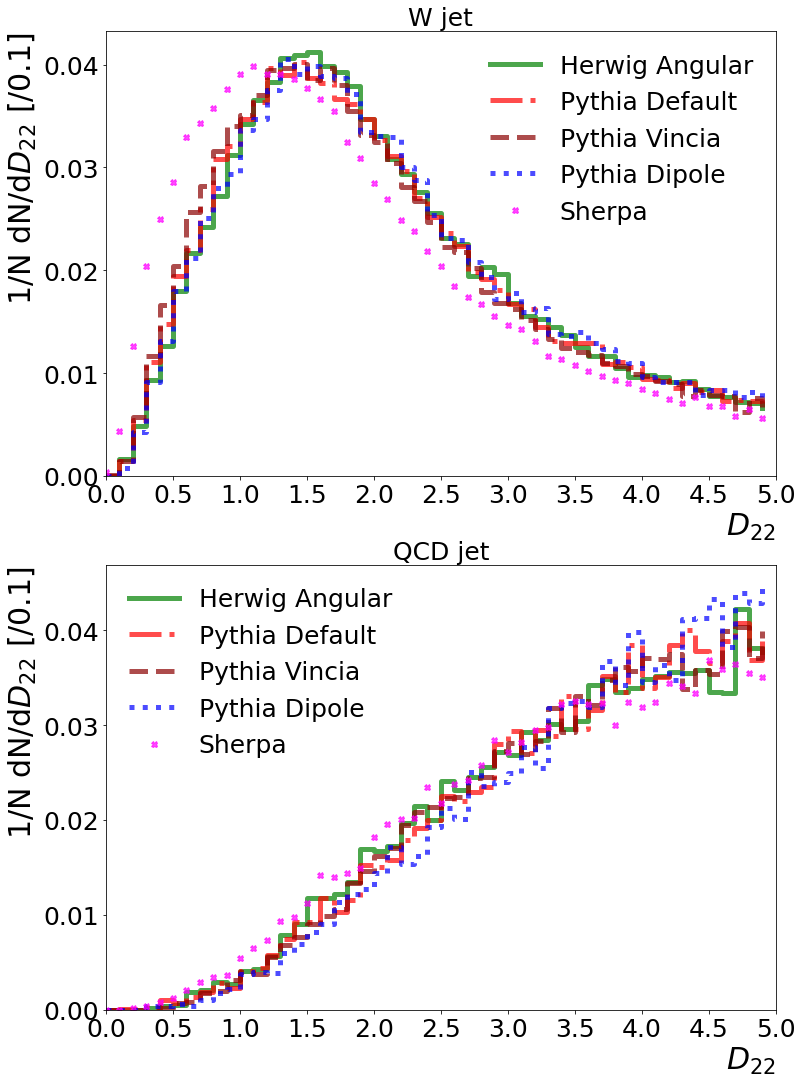

In [43]:

feature = "D22_0"
W_j = [herwig_ang_W[feature], pythia_def_W[feature], pythia_vin_W[feature], pythia_dip_W[feature], sherpa_def_W[feature]]
QCD_j = [herwig_ang_QCD[feature], pythia_def_QCD[feature], pythia_vin_QCD[feature], pythia_dip_QCD[feature], sherpa_def_QCD[feature]]

D_22 = [W_j,QCD_j]
Type_name = ["W jet", "QCD jet"]

xmin, xmax, grid = 0, 5, 51

plt.figure(figsize=(12,18))

for index, Type in enumerate(D_22):
    plot_axis = plt.subplot(2,1,index+1)
    for i, process in enumerate(Type):
        length = np.linspace(xmin,xmax,grid)
        HIST(process, length, title,colors[i],linestyle[i])
        plot_axis.tick_params(axis='x', labelsize=25)
        plot_axis.tick_params(axis='y', labelsize=25)

        plt.xlim((0,5))
        plt.xlabel("$D_{22}$", fontsize=30,horizontalalignment='right',x=1) 
        plot_axis.xaxis.set_major_locator(MaxNLocator(10))

    plt.title(Type_name[index],fontsize=25) 
#     plt.text(x=105, y=0.09, s="300 GeV < $p_T$ < 500 GeV",fontsize=25) 
    plt.ylim((0.))
    plt.ylabel("1/N dN/d$D_{22}$ [/" + str((xmax-xmin)/(grid-1))+"]", fontsize=30, horizontalalignment='right',y=1)

plt.savefig("./Plots/D22.png", transparent=True, bbox_inches='tight')
plt.show() 

